# Load and Verify the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcoCustomerChurn/TelcoChurnSQLCleaned.csv')

# Verify structure
print("Data Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4832 non-null   object 
 1   gender            4832 non-null   object 
 2   tenure            4832 non-null   int64  
 3   PhoneService      4832 non-null   int64  
 4   MultipleLines     4832 non-null   int64  
 5   InternetService   4832 non-null   object 
 6   OnlineSecurity    4832 non-null   int64  
 7   DeviceProtection  4832 non-null   int64  
 8   Contract          4832 non-null   object 
 9   PaymentMethod     4832 non-null   object 
 10  MonthlyCharges    4832 non-null   float64
 11  TotalCharges      4832 non-null   float64
 12  Churn             4832 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 490.9+ KB
None

First 5 Rows:
   customerID  gender  tenure  PhoneService  MultipleLines InternetService  \
0  5575-GNVDE  

# Analyze Churn Distribution

Churn Distribution (%):
Churn
0    67.177152
1    32.822848
Name: proportion, dtype: float64


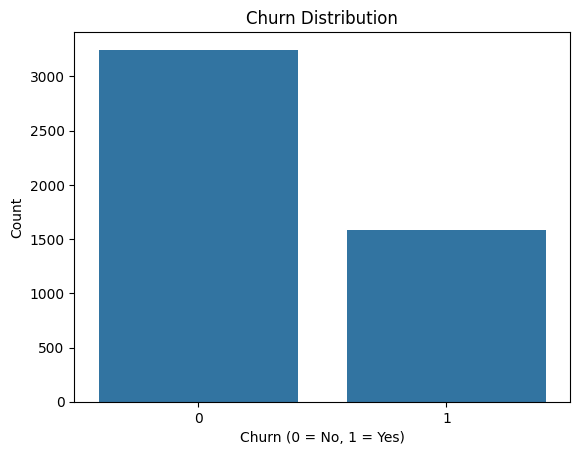

In [2]:
# Churn proportion
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):")
print(churn_counts)

# Visualize
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Explore Numeric Features

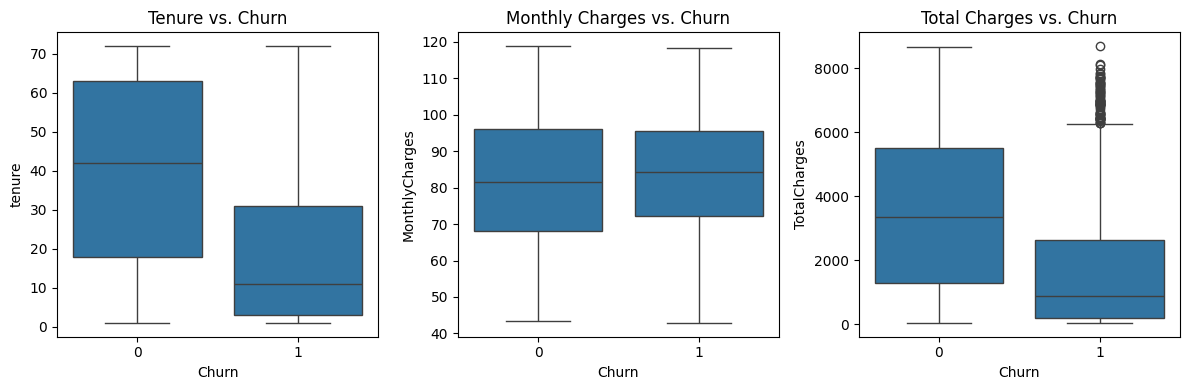

In [3]:
# Boxplots for numeric features vs. churn
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs. Churn')

plt.tight_layout()
plt.show()

# Analyze Categorical Features

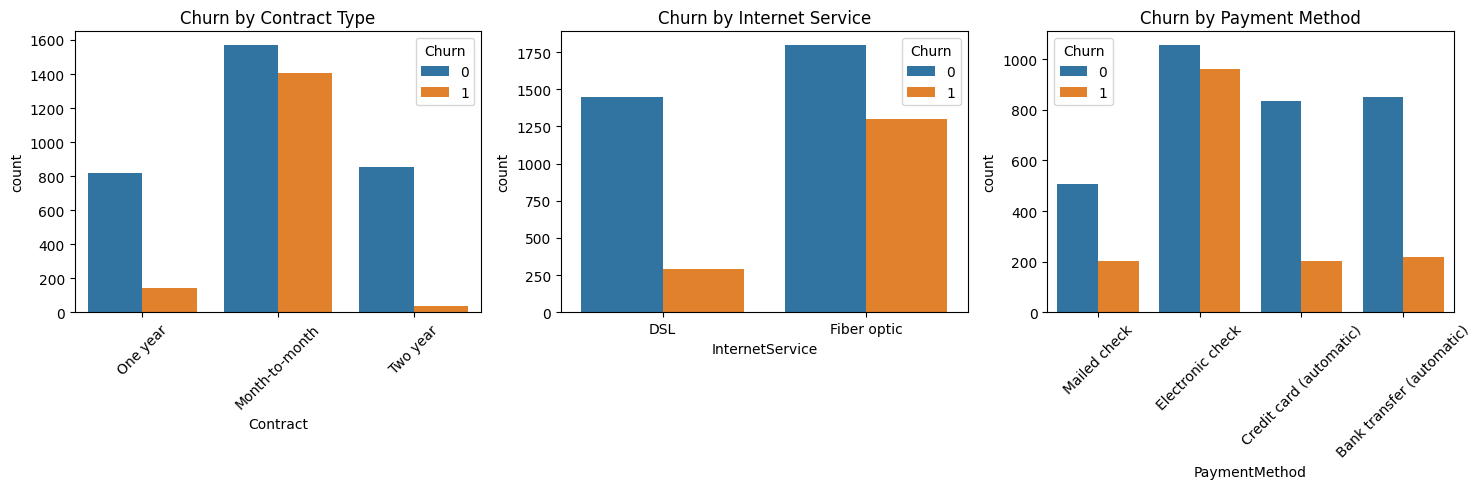

In [4]:
# Categorical plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')

plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Binary Features Analysis

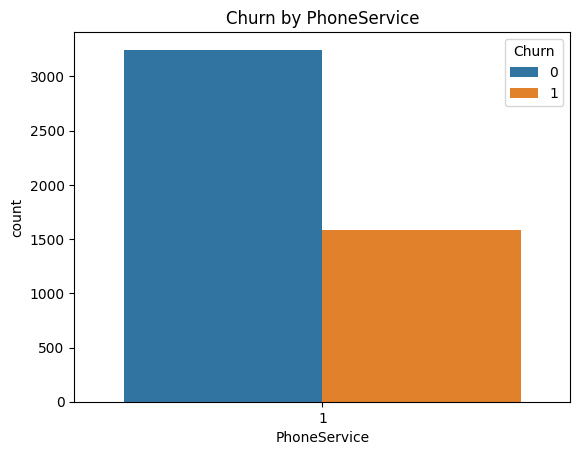

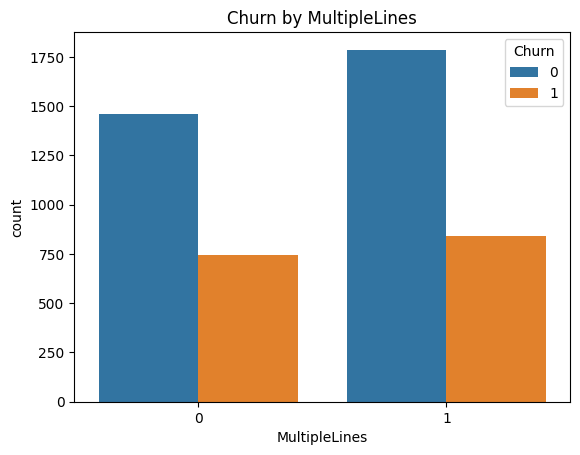

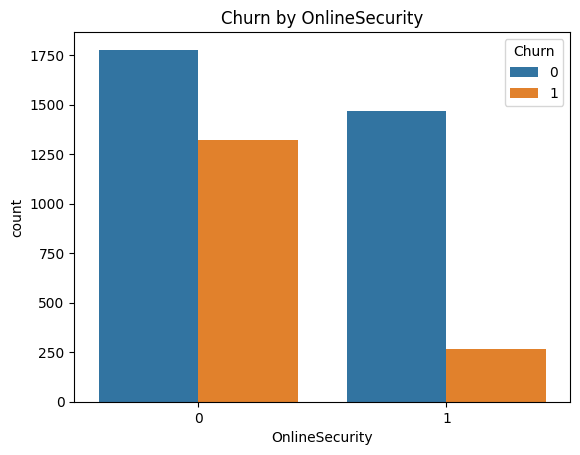

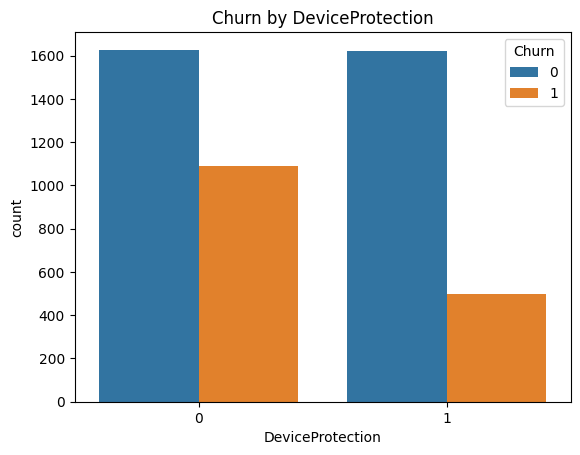

In [5]:
# Binary features vs. churn
binary_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection']
for col in binary_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.show()

# Correlation Analysis

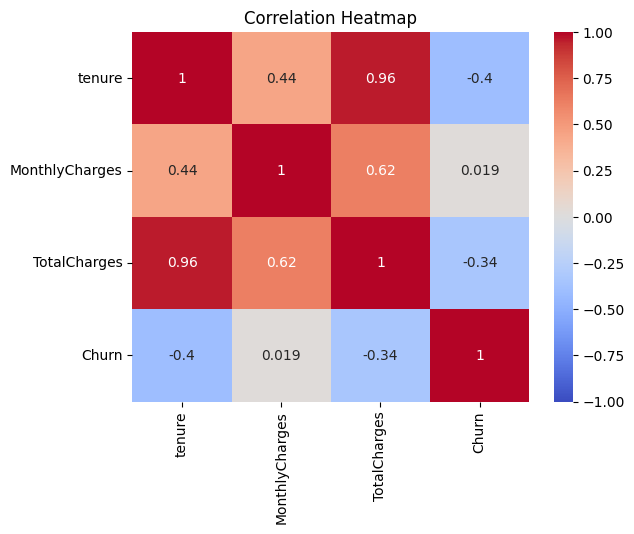

In [6]:
# Correlation heatmap
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()